In [17]:
import pandas as pd
import matplotlib.pyplot as plt


# Создание 1 периода из 5 месяцев

def scan_period(start_period, end_period):    
    date_range = pd.date_range(start=start_period, end=end_period, freq="MS")
    df_period = df[df['date'].isin(date_range)]
    filtered_df = df_period.pivot_table(columns='date', index='id_клиента', values='Объем')
    return filtered_df


# Фильтрация данных о клиентах по группам и их вхождению в ту или иную подгруппу (объем покупок за выбранный период, например, "XXXXX", "XXXXO" и т.д.).
# Далее подсчет количества уникальных клиентов в каждой подгруппе ("XXXXX", "XXXXO" и т.д.) и суммирование этого количества для всей группы ("Постоянные", "Неактивные" и т.д.).

def filter_const_clients(filtered_df):
    filtered_df_cl = [filtered_df[(~filtered_df.iloc[:, 0:5].isna().any(axis=1))].index.size,
                      filtered_df[filtered_df.iloc[:, 0:1].isna().all(axis=1) & (~filtered_df.iloc[:, 1:5].isna().any(axis=1))].index.size,
                      filtered_df[(~filtered_df.iloc[:, 0:1].isna().any(axis=1)) & filtered_df.iloc[:, 1:2].isna().all(axis=1) & (~filtered_df.iloc[:, 2:5].isna().any(axis=1))].index.size,
                      filtered_df[(~filtered_df.iloc[:, 0:2].isna().any(axis=1)) & filtered_df.iloc[:, 2:3].isna().all(axis=1) & (~filtered_df.iloc[:, 3:5].isna().any(axis=1))].index.size,
                      filtered_df[(~filtered_df.iloc[:, 0:3].isna().any(axis=1)) & filtered_df.iloc[:, 3:4].isna().all(axis=1) & (~filtered_df.iloc[:, 4:5].isna().any(axis=1))].index.size]
    res = sum(filtered_df_cl)
    return res

def filter_leaving_const_clients(filtered_df):
    filtered_df_lcl = [filtered_df[(~filtered_df.iloc[:, 0:4].isna().any(axis=1)) & filtered_df.iloc[:, 4:5].isna().all(axis=1)].index.size]
    res = sum(filtered_df_lcl)
    return res
    
def filter_irregular_clients(filtered_df):
    filtered_df_irrc = [filtered_df[filtered_df.iloc[:, 0:2].isna().all(axis=1) & (~filtered_df.iloc[:, 2:5].isna().any(axis=1))].index.size,
                        filtered_df[filtered_df.iloc[:, 0:1].isna().all(axis=1) & (~filtered_df.iloc[:, 1:2].isna().any(axis=1)) & filtered_df.iloc[:, 2:3].isna().all(axis=1) & (~filtered_df.iloc[:, 3:5].isna().any(axis=1))].index.size,
                        filtered_df[filtered_df.iloc[:, 0:1].isna().all(axis=1) & (~filtered_df.iloc[:, 1:3].isna().any(axis=1)) & filtered_df.iloc[:, 3:4].isna().all(axis=1) & (~filtered_df.iloc[:, 4:5].isna().any(axis=1))].index.size,
                        filtered_df[(~filtered_df.iloc[:, 0:1].isna().any(axis=1)) & filtered_df.iloc[:, 1:2].isna().all(axis=1) & (~filtered_df.iloc[:, 2:3].isna().any(axis=1)) & filtered_df.iloc[:, 3:4].isna().all(axis=1) & (~filtered_df.iloc[:, 4:5].isna().any(axis=1))].index.size,
                        filtered_df[(~filtered_df.iloc[:, 0:2].isna().any(axis=1)) & filtered_df.iloc[:, 2:4].isna().all(axis=1) & (~filtered_df.iloc[:, 4:5].isna().any(axis=1))].index.size,
                        filtered_df[filtered_df.iloc[:, 0:3].isna().all(axis=1) & (~filtered_df.iloc[:, 3:5].isna().any(axis=1))].index.size,
                        filtered_df[(~filtered_df.iloc[:, 0:1].isna().any(axis=1)) & filtered_df.iloc[:, 1:4].isna().all(axis=1) & (~filtered_df.iloc[:, 4:5].isna().any(axis=1))].index.size,
                        filtered_df[filtered_df.iloc[:, 0:1].isna().all(axis=1) & (~filtered_df.iloc[:, 1:2].isna().any(axis=1)) & filtered_df.iloc[:, 2:4].isna().all(axis=1) & (~filtered_df.iloc[:, 4:5].isna().any(axis=1))].index.size,
                        filtered_df[filtered_df.iloc[:, 0:2].isna().all(axis=1) & (~filtered_df.iloc[:, 2:3].isna().any(axis=1)) & filtered_df.iloc[:, 3:4].isna().all(axis=1) & (~filtered_df.iloc[:, 4:5].isna().any(axis=1))].index.size,
                        filtered_df[(~filtered_df.iloc[:, 0:1].isna().any(axis=1)) & filtered_df.iloc[:, 1:3].isna().all(axis=1) & (~filtered_df.iloc[:, 3:5].isna().any(axis=1))].index.size,
                        filtered_df[filtered_df.iloc[:, 0:1].isna().all(axis=1) & (~filtered_df.iloc[:, 1:4].isna().any(axis=1)) & filtered_df.iloc[:, 4:5].isna().all(axis=1)].index.size,
                        filtered_df[(~filtered_df.iloc[:, 0:1].isna().any(axis=1)) & filtered_df.iloc[:, 1:2].isna().all(axis=1) & (~filtered_df.iloc[:, 2:4].isna().any(axis=1)) & filtered_df.iloc[:, 4:5].isna().all(axis=1)].index.size,
                        filtered_df[(~filtered_df.iloc[:, 0:2].isna().any(axis=1)) & filtered_df.iloc[:, 2:3].isna().all(axis=1) & (~filtered_df.iloc[:, 3:4].isna().any(axis=1)) & filtered_df.iloc[:, 4:5].isna().all(axis=1)].index.size,
                        filtered_df[filtered_df.iloc[:, 0:2].isna().all(axis=1) & (~filtered_df.iloc[:, 2:4].isna().any(axis=1)) & filtered_df.iloc[:, 4:5].isna().all(axis=1)].index.size,
                        filtered_df[(~filtered_df.iloc[:, 0:1].isna().any(axis=1)) & filtered_df.iloc[:, 1:3].isna().all(axis=1) & (~filtered_df.iloc[:, 3:4].isna().any(axis=1)) & filtered_df.iloc[:, 4:5].isna().all(axis=1)].index.size,
                        filtered_df[filtered_df.iloc[:, 0:1].isna().all(axis=1) & (~filtered_df.iloc[:, 1:2].isna().any(axis=1)) & filtered_df.iloc[:, 2:3].isna().all(axis=1) & (~filtered_df.iloc[:, 3:4].isna().any(axis=1)) & filtered_df.iloc[:, 4:5].isna().all(axis=1)].index.size
                       ]
    res = sum(filtered_df_irrc)
    return res

def filter_leaving_clients(filtered_df):
    filtered_df_lc = [filtered_df[(~filtered_df.iloc[:, 0:3].isna().any(axis=1)) & filtered_df.iloc[:, 3:5].isna().all(axis=1)].index.size,
                      filtered_df[(~filtered_df.iloc[:, 0:1].isna().any(axis=1)) & filtered_df.iloc[:, 1:2].isna().all(axis=1) & (~filtered_df.iloc[:, 2:3].isna().any(axis=1)) & filtered_df.iloc[:, 3:5].isna().all(axis=1)].index.size,
                      filtered_df[filtered_df.iloc[:, 0:1].isna().all(axis=1) & (~filtered_df.iloc[:, 1:3].isna().any(axis=1)) & filtered_df.iloc[:, 3:5].isna().all(axis=1)].index.size]
    res = sum(filtered_df_lc)
    return res

def filter_once_clients(filtered_df):
    filtered_df_oc = [filtered_df[filtered_df.iloc[:, 0:3].isna().all(axis=1) & (~filtered_df.iloc[:, 3:4].isna().any(axis=1)) & filtered_df.iloc[:, 4:5].isna().all(axis=1)].index.size,
                      filtered_df[filtered_df.iloc[:, 0:2].isna().all(axis=1) & (~filtered_df.iloc[:, 2:3].isna().any(axis=1)) & filtered_df.iloc[:, 3:5].isna().all(axis=1)].index.size]
    res = sum(filtered_df_oc)
    return res

def filter_outflow_clients(filtered_df):
    filtered_df_outc = [filtered_df[(~filtered_df.iloc[:, 0:2].isna().any(axis=1)) & filtered_df.iloc[:, 2:5].isna().all(axis=1)].index.size,
                        filtered_df[filtered_df.iloc[:, 0:1].isna().all(axis=1) & (~filtered_df.iloc[:, 1:2].isna().any(axis=1)) & filtered_df.iloc[:, 2:5].isna().all(axis=1)].index.size]
    res = sum(filtered_df_outc)
    return res

def filter_losted_clients(filtered_df):
    filtered_df_lostc = [filtered_df[(~filtered_df.iloc[:, 0:1].isna().any(axis=1)) & filtered_df.iloc[:, 1:5].isna().all(axis=1)].index.size]
    res = sum(filtered_df_lostc)
    return res

# находим неактивных пользователей из выражения: Все_клиенты - Сумма(клиенты из всех остальных групп)
def filter_inactive_clients(filtered_df):
    date_range_inactive = pd.date_range(start='2022-01-01', end='2024-03-01', freq="MS")
    df_period_inactive = df[df['date'].isin(date_range_inactive)]
    filtered_df_inactive = df_period_inactive.pivot_table(columns='date', index='id_клиента', values='Объем')    
    clients_except_inactive = [filter_const_clients(filtered_df), 
                               filter_leaving_const_clients(filtered_df),
                               filter_irregular_clients(filtered_df),
                               filter_leaving_clients(filtered_df),
                               filter_once_clients(filtered_df),
                               filter_outflow_clients(filtered_df),
                               filter_losted_clients(filtered_df),                                
                               filter_new_returned_clients(filtered_df)]
    res = filtered_df_inactive.index.size - sum(clients_except_inactive)
    return res

def filter_new_returned_clients(filtered_df):
    filtered_df_rc = [filtered_df[filtered_df.iloc[:, 0:4].isna().all(axis=1) & (~filtered_df.iloc[:, 4:5].isna().any(axis=1))].index.size]
    res = sum(filtered_df_rc)
    return res

# Графики

# Создание 1 графика в форме пирога, на графике единицы измерения для групп клиентов - %.
# В функцию нужно подать pivot_table, которая генерируется в функции scan_period(start_period, end_period).
def make_curves(filtered_df): 
    labels = ['Постоянные', 'Уходящие постоянные', 'Нерегулярные', 'Уходящие', 'Разовые', 
          'Отток', 'Потерянные', 'Новые/возвращенные', 'Неактивные']
    sizes = [filter_const_clients(filtered_df), 
             filter_leaving_const_clients(filtered_df),
             filter_irregular_clients(filtered_df),
             filter_leaving_clients(filtered_df),
             filter_once_clients(filtered_df),
             filter_outflow_clients(filtered_df),
             filter_losted_clients(filtered_df),             
             filter_new_returned_clients(filtered_df),
             filter_inactive_clients(filtered_df)]
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%.0f%%');
    
# Создание 23 графиков формы pie на основе функции make_curves(*args) с 05 2022 по 03 2024
def create_graphs_all_periods():
    for i, key in enumerate(dates, start=1):
        fd = scan_period(dates[key][0], dates[key][1])
        make_curves(fd)
        pylab.title(f'Расчетный период: {key}')

# Создание 1 графика: по оси X - периоды, по оси Y - количество клиентов, которое распределено по группам ("Постоянные", "Неактивные" и т.д.).
def make_curves_2():
    labels = ['Постоянные', 'Уходящие постоянные', 'Нерегулярные', 'Уходящие', 'Разовые', 
          'Отток', 'Потерянные', 'Новые/возвращенные', 'Неактивные']
    year = [key for key in dates.keys()]
    quantity_clients_by_groups = {
    'Постоянные': [filter_const_clients(scan_period(dates[key][0], dates[key][1])) for key in dates.keys()],
    'Уходящие постоянные': [filter_leaving_const_clients(scan_period(dates[key][0], dates[key][1])) for key in dates.keys()],
    'Нерегулярные': [filter_irregular_clients(scan_period(dates[key][0], dates[key][1])) for key in dates.keys()],
    'Уходящие': [filter_leaving_clients(scan_period(dates[key][0], dates[key][1])) for key in dates.keys()],
    'Разовые': [filter_once_clients(scan_period(dates[key][0], dates[key][1])) for key in dates.keys()], 
    'Отток': [filter_outflow_clients(scan_period(dates[key][0], dates[key][1])) for key in dates.keys()],
    'Потерянные': [filter_losted_clients(scan_period(dates[key][0], dates[key][1])) for key in dates.keys()],
    'Новые/возвращенные': [filter_new_returned_clients(scan_period(dates[key][0], dates[key][1])) for key in dates.keys()],
    'Неактивные': [filter_inactive_clients(scan_period(dates[key][0], dates[key][1])) for key in dates.keys()]
    }

    fig, ax = plt.subplots(figsize=(16,9))
    ax.stackplot(year, quantity_clients_by_groups.values(),
                 labels=quantity_clients_by_groups.keys(), alpha=0.8)
    ax.legend(loc='upper left', reverse=True)
    ax.set_title('Изменения количества групп клиентов по периодам')
    ax.set_xticks([key for i, key in enumerate(dates) if i % 3 == 0])
    ax.set_xlabel('Расчетный период')
    ax.set_ylabel('Количество клиентов')

    
df = pd.read_excel('data.xlsb', sheet_name='data', engine='pyxlsb')
df['date'] = (pd.to_datetime("1899-12-30 00:00:00", yearfirst=True)+pd.to_timedelta(df["yyyy_mm"], unit="D"))

dates = {'05 2022': ['2022-01-01', '2022-05-01'], '06 2022': ['2022-02-01', '2022-06-01'],
         '07 2022': ['2022-03-01', '2022-07-01'], '08 2022': ['2022-04-01', '2022-08-01'], '09 2022': ['2022-05-01', '2022-09-01'], 
         '10 2022': ['2022-06-01', '2022-10-01'], '11 2022': ['2022-07-01', '2022-11-01'], '12 2022': ['2022-08-01', '2022-12-01'],
         '01 2023': ['2022-09-01', '2023-01-01'], '02 2023': ['2022-10-01', '2023-02-01'], '03 2023': ['2022-11-01', '2023-03-01'], 
         '04 2023': ['2022-12-01', '2023-04-01'], '05 2023': ['2023-01-01', '2023-05-01'], '06 2023': ['2023-02-01', '2023-06-01'],
         '07 2023': ['2023-03-01', '2023-07-01'], '08 2023': ['2023-04-01', '2023-08-01'], '09 2023': ['2023-05-01', '2023-09-01'], 
         '10 2023': ['2023-06-01', '2023-10-01'], '11 2023': ['2023-07-01', '2023-11-01'], '12 2023': ['2023-08-01', '2023-12-01'], 
         '01 2024': ['2023-09-01', '2024-01-01'], '02 2024': ['2023-10-01', '2024-02-01'], '03 2024': ['2023-11-01', '2024-03-01']}
segments = {"Постоянные": ['XXXXX', 'OXXXX', 'XOXXX', 'XXOXX', 'XXXOX'], 
            "Уходящие постоянные": ['XXXXO'],
            "Нерегулярные": ['OOXXX', 'OXOXX', 'OXXOX', 'XOXOX', 'XXOOX', 'OOOXX', 'XOOOX', 'OXOOX', 'OOXOX', 'XOOXX', 'OXXXO',
                             'XOXXO', 'XXOXO', 'OOXXO', 'XOOXO', 'OXOXO'],
            "Уходящие": ['XXXOO', 'XOXOO', 'OXXOO'],
            "Разовые": ['OOOXO', 'OOXOO'],
            "Отток": ['XXOOO', 'OXOOO'],
            "Потерянные": ['XOOOO'],
            "Новые/возвращенные": ['OOOOX'],
            "Неактивные": ['OOOOO']}

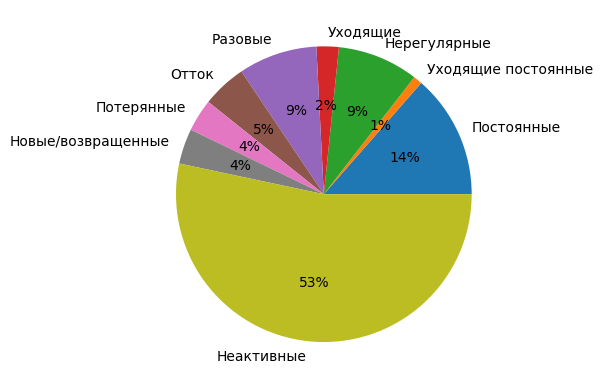

In [18]:
# Отдельное использование функции make_curves, строящей pie-график.
make_curves(scan_period('01 2022', '05 2022'))

In [19]:
# Процедура, которая строит 23 pie-графика, чтобы можно было посмотреть распределение количества клиентов по группам.
#create_graphs_all_periods()

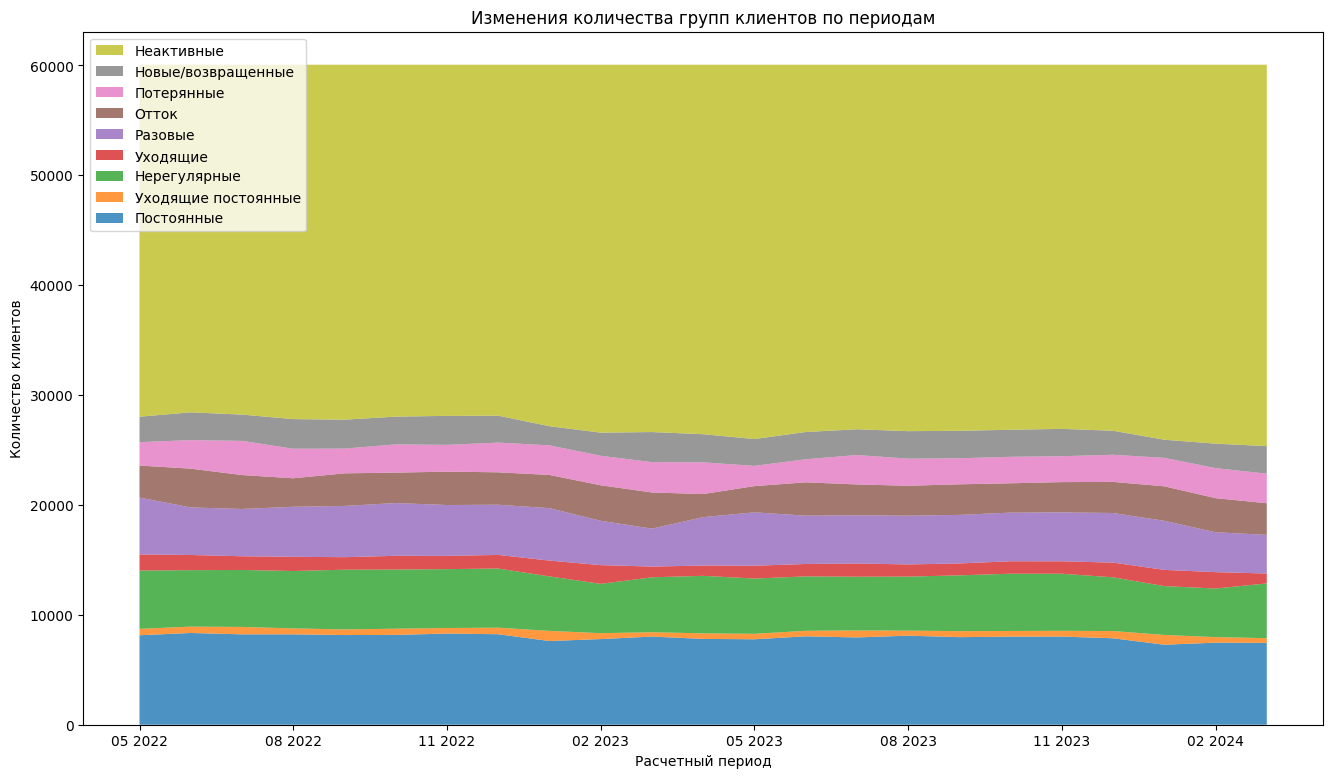

In [20]:
# Построение графика, наглядно показывающего изменения от периода к периоду.
make_curves_2()